<center><h1>Universiad Politecnica Salesiana</h1></center>
<center><h2>Examen Interciclo</h2></center>

##  Nombre:
Marcela Zhagui

- Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
   1. **Title:** Titulo del Post/Twitter
   2. **Word count:** la cantidad de palabras del artículo,
   3. **Numero of Links:** los enlaces externos que contiene,
   4. **Numero of **comments:** cantidad de comentarios,
   5. **Numero **Shares:** compartidos.
   6. **HashTag**, Etc.



In [282]:
import pandas as pd
import random
import os
import simpy
import numpy as np
import seaborn as sb
import tweepy
import json
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from facebook_scraper import get_posts
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 

In [325]:
def __contador__(post):
    cont=0
    for char in post:        
            cont+=1
    return cont

In [326]:
tendencias = [] 
for post in get_posts('yakuperezoficial', pages=20):
        post['Word count'] = len(post['text'])
        tendencias.append(post)          
facebook_posts = pd.DataFrame(tendencias)


In [327]:
posts = []
for post in get_posts('yakuperezoficial', pages=20):
    post['numWord']=__contador__(post['text'])
    posts.append(post)

for post in get_posts('ecuarauz2021', pages=20):
    post['numWord']=__contador__(post['text'])    
    posts.append(post)    
fb_posts = pd.DataFrame(posts)


In [328]:
file = open("post.txt","w") 
for like in fb_posts['likes']:
    file.write(str(like)+'\n')
file.close()
fb_posts.head()

,post_id,text,post_text,shared_text,time,image,video,video_thumbnail,video_id,likes,comments,shares,post_url,link,user_id,images,numWord
0,3323645617775175,"Te invito a conocer mi historia, vengo del Ecu...","Te invito a conocer mi historia, vengo del Ecu...",,2020-12-18 17:14:25,None,https://video.fcue1-1.fna.fbcdn.net/v/t42.9040...,https://scontent.fcue1-1.fna.fbcdn.net/v/t15.5...,2862820253993582,2345,209,0,https://facebook.com/watch?v=2862820253993582,None,2069422096530873,[],181
1,3325347017605035,Siempre estaremos agradecidos a esta ciudad de...,Siempre estaremos agradecidos a esta ciudad de...,,2020-12-20 21:28:53,https://scontent.fcue1-1.fna.fbcdn.net/v/t1.0-...,None,None,None,1603,87,0,https://facebook.com/story.php?story_fbid=3325...,None,2069422096530873,[https://scontent.fcue1-1.fna.fbcdn.net/v/t1.0...,362
2,385648012502573,⭕️ EN VIVO | En Minka recorriendo las calles d...,⭕️ EN VIVO | En Minka recorriendo las calles d...,,2020-12-20 19:17:35,None,https://scontent.fcue1-1.fna.fbcdn.net/v/t66.3...,https://scontent.fcue1-1.fna.fbcdn.net/v/t15.1...,385648012502573,1839,1498,1234,https://facebook.com/watch?v=385648012502573,http://www.yakuperez.com/,2069422096530873,[],243
3,3527467170811722,⭕️ EN VIVO | La caravana de la honestidad lleg...,⭕️ EN VIVO | La caravana de la honestidad lleg...,,2020-12-20 18:25:40,None,https://scontent.fcue1-1.fna.fbcdn.net/v/t66.3...,https://scontent.fcue1-1.fna.fbcdn.net/v/t15.1...,3527467170811722,2289,1444,1064,https://facebook.com/watch?v=3527467170811722,http://www.yakuperez.com/,2069422096530873,[],235
4,416013382875064,⭕️ EN VIVO | La caravana de la honestidad lleg...,⭕️ EN VIVO | La caravana de la honestidad lleg...,,2020-12-20 17:16:18,None,https://scontent.fcue1-1.fna.fbcdn.net/v/t66.3...,https://scontent.fcue1-1.fna.fbcdn.net/v/t15.1...,416013382875064,1893,1976,1246,https://facebook.com/watch?v=416013382875064,http://www.yakuperez.com/,2069422096530873,[],231


In [329]:
fb_posts.describe()

,likes,comments,shares,numWord
count,156.000000,156.000000,156.000000,156.000000
mean,2045.179487,531.878205,327.820513,220.493590
std,1215.256333,804.277126,664.148434,126.143671
min,202.000000,6.000000,0.000000,0.000000
25%,1295.000000,96.750000,0.000000,145.000000
50%,1766.500000,190.000000,0.000000,228.000000
75%,2476.500000,629.500000,446.500000,287.000000
max,9111.000000,5118.000000,4484.000000,687.000000


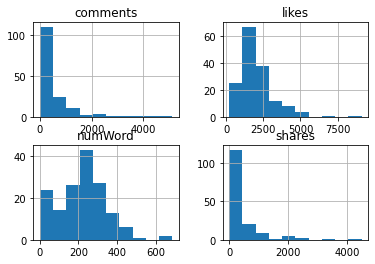

In [330]:
fb_posts.drop(['post_id','post_url', 'text', 'shared_text','video_thumbnail','video_id'],1).hist()
plt.show()

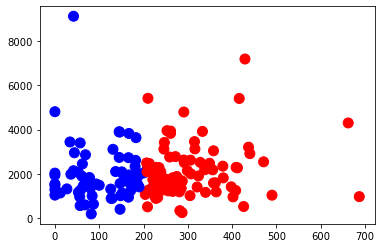

In [331]:
filtered_data = fb_posts[(fb_posts['numWord'] <= 68700) & (fb_posts['likes'] <= 80000)]
colores=['red','blue']

numerotr = filtered_data['numWord'].values
numeroLike = filtered_data['likes'].values

tamanios=[100]
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['numWord']>200):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(numerotr, numeroLike, c=asignar, s=tamanios[0])
plt.show()

In [347]:

#fb_posts.plot(x='likes', y=['shares','comments', 'numWord',],figsize=(20,20),title="Tendencia en Twitter")
#plt.xlabel('post_id, tuits, tamaño de texto')
#plt.ylabel('Seguidores')
#plt.grid('true')
#plt.show()


In [333]:
dataX =filtered_data[["numWord"]]
X_train = np.array(dataX)
y_train = filtered_data['likes'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 

In [334]:
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.91475988]
Independent term: 
 1843.4807982788768
Mean squared error: 1454151.21
Variance score: 0.01


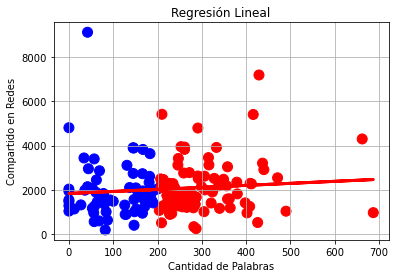

In [335]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')
plt.grid('true')
plt.show()

In [336]:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

3673


In [337]:
random.seed(1)
yaku_digits = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
arauz_digits = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

arauz_win_pct = 29.28
total_wards = 0
total_arauz_votes = 0
total_yaku_votes = 0
total_votes = 0

In [345]:
for i in range(1000):
    my_input = open('post.txt')
    for line in my_input:
        total_wards += 1
        fields = line.strip().split()
        num_voters = int(fields[0])
        arauz_votes_in_ward = 0
        yaku_votes_in_ward = 0
        for j in range(num_voters):  
            random_num = random.random() * 100
            if random_num <= 68.1:
                yaku_votes_in_ward += 1
                total_yaku_votes += 1
            elif random_num <= (68.1 + 31.9) :
                arauz_votes_in_ward += 1
                total_arauz_votes += 1
            total_votes += 1
        arauz_digit = int(str(arauz_votes_in_ward)[0])
        yaku_digit = int(str(yaku_votes_in_ward)[0])
        arauz_digits[arauz_digit] += 1
        yaku_digits[yaku_digit] += 1


In [346]:
print('Arauz con:', 100.0 * total_arauz_votes / total_votes , '%')
print('Yaku Perez con :', 100.0 * total_yaku_votes / total_votes, '%')

Arauz con: 30.153131608201065 %
Yaku Perez con : 68.44422740987773 %


In [290]:
totalPersonas=37000
media=29

class Persona:
    nombre = ''
    cargo=''
    estado=''
    prueba=0

    def __init__(self, nombre, cargo,estado,prueba):
        self.nombre = nombre
        self.cargo=cargo
        self.estado=estado
        self.estado=prueba

In [291]:
def cargo():
    #SELECCION DE CANDIDATOS
    pr = random.randint(1, 5)
    if pr == 1:
        return 'CandidatoA'
    if pr == 2:
        return 'CandidatoB'
    if pr == 3:
        return 'CandidatoC'
    if pr == 5:
        return 'CandidatoD'
    if pr == 4:
        return 'CandidatoE'

In [292]:
personas=[]
#generar personas
for i in range(0, totalPersonas):
    persona = Persona('Persona-%d'%i,cargo(), '', 0)
    personas.append(persona)
    persona = None

In [313]:
#personas  
NumeroPersonas=len(personas)
#tiempo simulacion 
TIEMPO=3600
#Intervalo de llegada
INTERVALO=media

tiempoVotacion={}
tiempoPresencial={}
sinMesa=[]
conMesa=[]
tele=[]
pre=[]

class Empresa:
    
    def __init__(self,environment,recursos):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        self.recursos = simpy.Resource(environment, recursos)
    def mesas(self, mint):
        #CONVERSION DE segundos A minuntos
        if mint > 120 and mint <= 150:
            return 'mesa_1'
        if mint > 150 and mint <= 180:
            return 'mesa_2'
        if mint > 180 and mint <= 210:
            return 'mesa_3'
        if mint > 210 and mint <= 240:
            return 'mesa_4'
        if mint > 240 and mint <= 270:
            return 'mesa_5'
        if mint > 270 and mint <= 300:
            return 'mesa_6'
        if mint > 300 and mint <= 330:
            return 'mesa_7'
        if mint > 330:
            return 'mesa_8'
        
        if mint >= 0 and mint <= 30:
            return 'mesa_9' 
        if mint > 30 and mint <= 60:
            return 'mesa_10'
        if mint > 60 and mint <= 90:
            return 'mesa_11'
        if mint > 90 and mint <= 120:
            return 'mesa_12'
        
            
        
    def aviso(self, persona):
        pr = random.randint(1, 100)
        if pr <=70:
            persona.estado ="Mesa"
            print('Aviso', persona.nombre, persona.estado)
            sinMesa.append(persona)
        else:
            persona.estado ="Sin MESA"
            print('Aviso ', persona.nombre,persona.estado)
            conMesa.append(persona)
        yield self.env.timeout(1)    
        
    def descanso_hogar(self, persona):
        #Persona recuperada debe descansar de 2 a 7 dias 
        tiempo = random.randint(2, 7)
        yield self.env.timeout(tiempo)
        print('La ', persona.nombre, ' Persona enespera: ', tiempo, ' minutos')
        
    def teletrabajo(self, persona):
        tiempo = random.randint(5, 14)
        print('La ', persona.nombre, 'Empieza en la mesa en el minuto: ',tiempo)
        tele.append(persona)
        mesa = self.mesas(self.env.now)
        tiempoVotacion[persona.nombre,persona.cargo]=mesa
        
        self.prueba(persona)
        if  persona.prueba == 1:
            tiempo = random.randint(3, 7)
            yield self.env.timeout(tiempo)
            print('La ', persona.nombre, 'Siguiente mesa a votar el usuario: ',tiempo)
            tele.append(persona)
            mesa = self.mesas(self.env.now)
            tiempoVotacion[persona.nombre,persona.cargo]=mesa
            self.prueba(persona)
        
    def prueba(self, persona):
        pr = random.randint(0,100)
        if pr <=70:
            persona.test = 2
            
            print('La', persona.nombre, 'El usuario sigue en la mesa de:', persona.cargo)
            mesa = self.mesas(self.env.now)
            tiempoPresencial[persona.nombre,persona.cargo]=mesa
            pre.append(persona)
        else:
            print('La', persona.nombre, '  No pasa Valoracion tiene que regresear esperar por 3-5 min CARGO=:', persona.cargo)
            persona.prueba=1
            mesa = self.mesas(self.env.now)
            tiempoVotacion[persona.nombre,persona.cargo]=mesa
            tele.append(persona)
            
            
    
            
    
    
    

In [314]:
def simular(env, persona, empresa):
        with empresa.recursos.request() as recurso:
            yield recurso
            yield env.process(empresa.aviso(persona))
        
        if persona.estado=="Con Trabajo":
            yield env.process(empresa.descanso_hogar(persona))
            yield env.process(empresa.teletrabajo(persona))

In [315]:
def ejecutar_simulacion(env, estacion):
    empresa = Empresa(env, estacion)
    for persona in personas:
        yield env.timeout(1)
        env.process(simular(env, persona, empresa))
env = simpy.Environment()
env.process(ejecutar_simulacion(env, INTERVALO))
env.run(until = TIEMPO)

Aviso  Persona-0 Sin MESA
Aviso Persona-1 Mesa
Aviso Persona-2 Mesa
Aviso Persona-3 Mesa
Aviso Persona-4 Mesa
Aviso Persona-5 Mesa
Aviso Persona-6 Mesa
Aviso Persona-7 Mesa
Aviso  Persona-8 Sin MESA
Aviso  Persona-9 Sin MESA
Aviso Persona-10 Mesa
Aviso Persona-11 Mesa
Aviso  Persona-12 Sin MESA
Aviso Persona-13 Mesa
Aviso  Persona-14 Sin MESA
Aviso Persona-15 Mesa
Aviso Persona-16 Mesa
Aviso Persona-17 Mesa
Aviso  Persona-18 Sin MESA
Aviso Persona-19 Mesa
Aviso Persona-20 Mesa
Aviso Persona-21 Mesa
Aviso  Persona-22 Sin MESA
Aviso  Persona-23 Sin MESA
Aviso Persona-24 Mesa
Aviso  Persona-25 Sin MESA
Aviso Persona-26 Mesa
Aviso  Persona-27 Sin MESA
Aviso Persona-28 Mesa
Aviso  Persona-29 Sin MESA
Aviso Persona-30 Mesa
Aviso Persona-31 Mesa
Aviso Persona-32 Mesa
Aviso  Persona-33 Sin MESA
Aviso Persona-34 Mesa
Aviso Persona-35 Mesa
Aviso  Persona-36 Sin MESA
Aviso Persona-37 Mesa
Aviso  Persona-38 Sin MESA
Aviso  Persona-39 Sin MESA
Aviso Persona-40 Mesa
Aviso Persona-41 Mesa
Aviso Perso

Aviso Persona-984 Mesa
Aviso Persona-985 Mesa
Aviso Persona-986 Mesa
Aviso Persona-987 Mesa
Aviso Persona-988 Mesa
Aviso  Persona-989 Sin MESA
Aviso Persona-990 Mesa
Aviso Persona-991 Mesa
Aviso  Persona-992 Sin MESA
Aviso Persona-993 Mesa
Aviso  Persona-994 Sin MESA
Aviso Persona-995 Mesa
Aviso Persona-996 Mesa
Aviso Persona-997 Mesa
Aviso Persona-998 Mesa
Aviso Persona-999 Mesa
Aviso  Persona-1000 Sin MESA
Aviso Persona-1001 Mesa
Aviso Persona-1002 Mesa
Aviso  Persona-1003 Sin MESA
Aviso  Persona-1004 Sin MESA
Aviso Persona-1005 Mesa
Aviso  Persona-1006 Sin MESA
Aviso Persona-1007 Mesa
Aviso  Persona-1008 Sin MESA
Aviso Persona-1009 Mesa
Aviso Persona-1010 Mesa
Aviso Persona-1011 Mesa
Aviso  Persona-1012 Sin MESA
Aviso Persona-1013 Mesa
Aviso Persona-1014 Mesa
Aviso  Persona-1015 Sin MESA
Aviso Persona-1016 Mesa
Aviso Persona-1017 Mesa
Aviso  Persona-1018 Sin MESA
Aviso Persona-1019 Mesa
Aviso Persona-1020 Mesa
Aviso Persona-1021 Mesa
Aviso Persona-1022 Mesa
Aviso  Persona-1023 Sin M

Aviso Persona-1994 Mesa
Aviso Persona-1995 Mesa
Aviso  Persona-1996 Sin MESA
Aviso Persona-1997 Mesa
Aviso Persona-1998 Mesa
Aviso Persona-1999 Mesa
Aviso Persona-2000 Mesa
Aviso  Persona-2001 Sin MESA
Aviso  Persona-2002 Sin MESA
Aviso Persona-2003 Mesa
Aviso Persona-2004 Mesa
Aviso Persona-2005 Mesa
Aviso Persona-2006 Mesa
Aviso  Persona-2007 Sin MESA
Aviso Persona-2008 Mesa
Aviso Persona-2009 Mesa
Aviso Persona-2010 Mesa
Aviso Persona-2011 Mesa
Aviso  Persona-2012 Sin MESA
Aviso Persona-2013 Mesa
Aviso Persona-2014 Mesa
Aviso Persona-2015 Mesa
Aviso  Persona-2016 Sin MESA
Aviso Persona-2017 Mesa
Aviso Persona-2018 Mesa
Aviso Persona-2019 Mesa
Aviso Persona-2020 Mesa
Aviso Persona-2021 Mesa
Aviso  Persona-2022 Sin MESA
Aviso  Persona-2023 Sin MESA
Aviso Persona-2024 Mesa
Aviso Persona-2025 Mesa
Aviso Persona-2026 Mesa
Aviso Persona-2027 Mesa
Aviso Persona-2028 Mesa
Aviso  Persona-2029 Sin MESA
Aviso  Persona-2030 Sin MESA
Aviso Persona-2031 Mesa
Aviso  Persona-2032 Sin MESA
Aviso Per

Aviso Persona-3055 Mesa
Aviso Persona-3056 Mesa
Aviso  Persona-3057 Sin MESA
Aviso Persona-3058 Mesa
Aviso  Persona-3059 Sin MESA
Aviso Persona-3060 Mesa
Aviso  Persona-3061 Sin MESA
Aviso Persona-3062 Mesa
Aviso Persona-3063 Mesa
Aviso Persona-3064 Mesa
Aviso Persona-3065 Mesa
Aviso Persona-3066 Mesa
Aviso Persona-3067 Mesa
Aviso Persona-3068 Mesa
Aviso Persona-3069 Mesa
Aviso  Persona-3070 Sin MESA
Aviso Persona-3071 Mesa
Aviso Persona-3072 Mesa
Aviso  Persona-3073 Sin MESA
Aviso Persona-3074 Mesa
Aviso Persona-3075 Mesa
Aviso Persona-3076 Mesa
Aviso Persona-3077 Mesa
Aviso  Persona-3078 Sin MESA
Aviso Persona-3079 Mesa
Aviso Persona-3080 Mesa
Aviso Persona-3081 Mesa
Aviso Persona-3082 Mesa
Aviso Persona-3083 Mesa
Aviso Persona-3084 Mesa
Aviso Persona-3085 Mesa
Aviso Persona-3086 Mesa
Aviso Persona-3087 Mesa
Aviso Persona-3088 Mesa
Aviso Persona-3089 Mesa
Aviso Persona-3090 Mesa
Aviso Persona-3091 Mesa
Aviso  Persona-3092 Sin MESA
Aviso Persona-3093 Mesa
Aviso Persona-3094 Mesa
Aviso

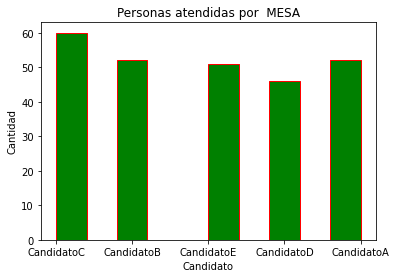

<BarContainer object of 261 artists>

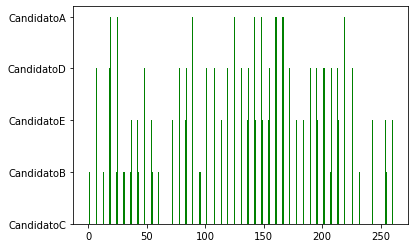

In [307]:
import matplotlib.pyplot as plt

plt.hist([persona.cargo for persona in sinMesa],bins=10, edgecolor='red',color = "g")

plt.title("Personas atendidas por  MESA")
plt.xlabel("Candidato")
plt.ylabel("Cantidad")
plt.show()

X = np.arange(len(sinMesa))
plt.bar(X,[persona.cargo for persona in sinMesa],color = "g", width = 0.25)

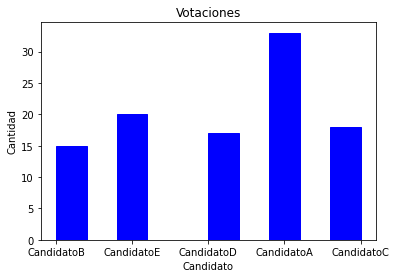

<BarContainer object of 103 artists>

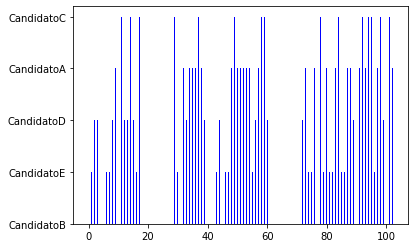

In [308]:

plt.hist([persona.cargo for persona in conMesa],bins=10, edgecolor='blue',color = "b")

plt.title("Votaciones")
plt.xlabel("Candidato")
plt.ylabel("Cantidad")
plt.show()

X = np.arange(len(conMesa))
plt.bar(X,[persona.cargo for persona in conMesa],color = "b", width = 0.25)


values= tiempoVotacion.values()
mesa=list(values)
plt.hist([ m for m in mes], bins=100, edgecolor = 'black',linewidth=0.5)
plt.title("Candidatos por mesa")
plt.xlabel("Candidatos")
plt.ylabel("Cantidad")
plt.show()
X = np.arange(len(mesa))
plt.bar(X,[persona for persona in mess],color = "b", width = 0.25)

# Conclusiones
Con los datos obtenidos de los dos modelos y después de realizar las diferentes comparaciones llegamos a la conclusión de que ambos modelos tienen un gran grado de acierto en la predicción de los datos, y si se hiciera una valoración matemática en cuanto al ajuste de la curva ambos modelos tendrían resultados casi parecido con la diferencia de que ciertos valores tienden a creciente Modelo Lineal, por otra parte en la comparacion de los modelos se puede observa en las distintas graficas en donde se platean los  datos reales donde se puede observar la tendecia de crecimiento y decrecimiento 

